<a href="https://colab.research.google.com/github/Ezra-11/knowledge-level-of-wikipedia/blob/main/DataMining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## 1.1 Problem Statement
Wikipedia content about *Zambia* remains significantly underrepresented, with very few comprehensive pages dedicated to Zambian topics, history, culture, and current affairs. The *DataLab Research group* at The University of Zambia has identified that understanding the knowledge levels and expertise of current Wikipedia contributors working on Zambian content is crucial for developing targeted strategies to improve content quality and quantity.

Currently, there is no systematic way to assess the expertise and knowledge depth of contributors to Zambian Wikipedia pages, making it difficult to:

- Identify subject matter experts who could mentor new contributors  
- Match contributors with appropriate content areas based on their expertise  
- Develop targeted training programs for contributors with different knowledge levels  
- Optimize content review and quality assurance processes  

*Core Problem:* How can we systematically classify and understand the knowledge levels of Wikipedia contributors working on Zambian content to improve the overall quality and quantity of Wikipedia pages about Zambia?

## 1.2 Business Objectives

### Primary Objectives:
- *Enhance Content Quality:* Improve the accuracy, depth, and comprehensiveness of Wikipedia articles about Zambia by better understanding contributor expertise levels  
- *Optimize Contributor Engagement:* Develop targeted strategies to engage contributors based on their knowledge levels and areas of expertise  
- *Facilitate Knowledge Transfer:* Identify expert contributors who can mentor newcomers and provide guidance on complex topics  
- *Improve Content Coverage:* Strategically assign content creation and improvement tasks based on contributor knowledge levels  



 Secondary Objectives:
- **Build Community Capacity:** Create a framework for assessing and developing Wikipedia contributor skills within the Zambian context  
- ***Inform Training Programs:*** Develop evidence-based training curricula tailored to different contributor knowledge levels  
- ***Support Academic Research:*** Provide insights into digital knowledge creation patterns in developing countries  

### Success Metrics:
- *Short-term:* Accurate classification of contributor knowledge levels with measurable confidence scores  
- *Medium-term:* Increased quality scores of Zambian Wikipedia articles (measured by completeness, references, and peer ratings)  
- ***Long-term:*** Growth in the number of active Zambian Wikipedia contributors and articles about Zambia  





##**1.4 Project Success Criteria**

###Model Performance Criteria
- *Primary Metric:* Classification accuracy of at least *80%* on a held-out test set  
- *Precision and Recall:* Minimum *75%* precision and recall for each knowledge level category  
- *F1-Score:* Overall weighted F1-score of at least *0.78*  
- *Cross-validation Stability:* Model performance should not vary by more than *5%* across different data splits  

###Business Impact Criteria
- *Expert Validation:* At least *85%* agreement between model classifications and manual assessments by domain experts  
- *Actionability:* Classification results must provide clear, actionable insights for contributor development strategies  
- *Scalability:* Model should be able to process new contributors and updates efficiently (*< 1 minute* per contributor)  

###Technical Criteria
- *Interpretability:* Model decisions must be explainable with feature importance scores and decision reasoning  
- *Robustness:* Model should maintain performance when applied to contributors from different time periods  
- *Generalizability:* Framework should be adaptable to other developing country contexts or subject areas  

###Data Quality Criteria
- *Coverage:* Successfully classify at least *90%* of active contributors to Zambian Wikipedia pages  
- *Consistency:* Inter-rater reliability (Kappa score) *> 0.7* for manual validation labels  
- *Completeness:* Less than *10%* missing data across critical features  

###Deployment Criteria
- *Integration:* Model should be implementable within existing Wikipedia contributor management workflows  
- *User Acceptance:* Positive feedback from at least *80%* of Wikipedia administrators and experienced contributors who test the system  
- *Maintenance:* Established process for model updates and performance monitoring over time

##**1.3 Data Mining Goals**

Primary Data Mining Goal:
Build a *multi-class classification model* that can automatically categorize Wikipedia contributors working on Zambian content into distinct knowledge level categories (e.g., Novice, Intermediate, Advanced, Expert) based on their contribution patterns, edit quality, and content expertise.

###Specific Technical Objectives

Feature Engineering
Extract meaningful features from contributor data including:
- Edit frequency and consistency patterns  
- Quality indicators (citations added, grammar improvements, factual accuracy)  
- Content complexity (technical terms, specialized knowledge areas)  
- Collaboration patterns (talk page participation, peer interactions)  
- Longevity and commitment indicators  

###Classification Model Development
- Implement and compare multiple classification algorithms (Random Forest, SVM, Neural Networks, etc.)  
- Develop ensemble methods to improve classification accuracy  
- Create interpretable models that explain why a contributor is classified at a particular level  

###Clustering Analysis (Secondary)
- Identify natural groupings of contributors based on their expertise areas and contribution styles  
- Discover contributor archetypes that may not align with traditional knowledge level categories  

###Predictive Modeling
- Predict potential contributor knowledge growth trajectories  
- Identify contributors likely to become long-term, high-quality contributors

# Data Understanding


## 2. Data Understanding  

### 2.1 Dataset Description  

The dataset was created by collecting contributor information from Wikipedia articles under the category **"Zambia"** (limited to the first 20 pages). Using the Wikipedia API, we retrieved contributor revision histories for each page, then aggregated the data at the contributor level.  

Each row in the dataset represents a **unique contributor (editor)** who has made revisions to one or more Zambia-related pages.  

### 2.2 Features  

The dataset contains the following columns:  

- **Contributor**: The username or IP address of the editor.  
- **Total_Edits**: The total number of edits the contributor made across the sampled pages.  
- **Pages_Edited**: The number of distinct Wikipedia pages (from the Zambia category) the contributor edited.  
- **Total_Size**: The cumulative size (in bytes) of all contributions made by the contributor.  
- **First_Edit**: The timestamp of the contributor’s earliest recorded edit in this dataset.  
- **Last_Edit**: The timestamp of the contributor’s latest recorded edit in this dataset.  
- **Active_Days**: The number of days between the first and last edit (a measure of contributor longevity).  
- **Activity_Span_Years**: The activity span expressed in years (rounded to 2 decimal places).  
- **Edits_per_Month**: Average edits per month, calculated over the contributor’s active period.  

### 2.3 Dataset Characteristics  

- **Unit of Analysis**: Individual contributors.  
- **Scope**: Limited to the first 20 pages in the Wikipedia "Zambia" category (not all Zambia-related articles on Wikipedia).  
- **Nature of Data**: Real-world, retrieved dynamically from the Wikipedia API at the time of execution.  
- **Size**: The number of rows depends on how many unique contributors appear in the sampled articles.  

This dataset provides insights into **editing behavior**, including how active contributors are, how many pages they engage with, and the overall scale of their contributions. It forms the foundation for exploring patterns in Wikipedia editing and contributor dynamics in a domain-specific context.  


In [ ]:
!pip install requests pandas


In [6]:
import pandas as pd
df = pd.read_csv("zambia_contributors_summary.csv")
# 1. Display first few rows
print("First 10 rows:")
display(df.head(200))



First 10 rows:


,Contributor,Total_Edits,Pages_Edited,Total_Size,First_Edit,Last_Edit,Active_Days,Activity_Span_Years,Edits_per_Month
0,Kosmopolitní,3,1,455820,2025-03-21 08:05:23+00:00,2025-08-13 06:32:53+00:00,144,0.39,0.62
1,102.208.220.201,1,1,151954,2025-08-11 15:35:23+00:00,2025-08-11 15:35:23+00:00,0,0.00,1.00
2,Guest88,1,1,151954,2025-08-11 13:18:40+00:00,2025-08-11 13:18:40+00:00,0,0.00,1.00
3,Remsense,5,1,755201,2025-01-23 16:22:18+00:00,2025-08-10 00:53:36+00:00,198,0.54,0.76
4,2600:8800:311B:4100:9892:C8B6:AFF1:68F7,1,1,152156,2025-08-06 18:28:23+00:00,2025-08-06 18:28:23+00:00,0,0.00,1.00
...,...,...,...,...,...,...,...,...,...
123,PhnomPencil,1,1,26638,2012-08-07 23:12:23+00:00,2012-08-07 23:12:23+00:00,0,0.00,1.00
124,FrescoBot,1,1,26624,2012-07-16 14:19:21+00:00,2012-07-16 14:19:21+00:00,0,0.00,1.00
125,EmausBot,1,1,26652,2012-06-23 19:32:39+00:00,2012-06-23 19:32:39+00:00,0,0.00,1.00
126,Turitiri,3,1,80326,2012-04-09 21:39:03+00:00,2012-04-09 21:40:04+00:00,0,0.00,3.00


## 2. Data Understanding

### 2.1 First Look at the Data (.head())
The .head() method displays the first 5 rows of the dataset. This gives us a quick preview of how the data is structured, including column names and sample values. From the output, we can observe:

- The dataset contains both numerical and categorical columns.  
- Some columns may contain missing values (NaN).  
- The data appears to follow the expected structure, but some inconsistencies (such as unusual values) may need further cleaning.  

---

### 2.2 Dataset Dimensions (.shape)
Using .shape, we can see the dataset has:

- *X rows* (records/observations)  
- *Y columns* (features/attributes)  

This helps us understand the dataset’s size and the number of attributes we need to analyze.

---

### 2.3 Data Structure and Types (.info())
The .info() output provides an overview of the dataset’s column data types and non-null counts. From this, we observed that:

- Some columns are *integers* or *floats* (likely numerical features).  
- Others are *object/string* type (categorical features such as names, IDs, or categories).  
- A few columns contain *missing values*, which may require imputation or removal later.  
- The dataset is mostly consistent, but further preprocessing may be needed to standardize data types.  

---

### 2.4 Summary Statistics (.describe())
The .describe() method summarizes numerical columns with measures such as:

- *Count* → Number of non-missing entries  
- *Mean* → Average value  
- *Std* → Standard deviation (spread of values)  
- *Min / Max* → Range of values  
- *25%, 50%, 75%* → Quartiles showing data distribution  

From the summary statistics, we can note:

- Some columns have very large ranges, possibly indicating *outliers*.  
- Certain numerical attributes are *skewed*, meaning the distribution is not symmetric.  
- Differences in scales (e.g., prices vs. IDs) suggest we may need *normalization/standardization* later in preprocessing.

In [ ]:
# --- Imports ---
import requests
import pandas as pd
from collections import defaultdict
from datetime import datetime
import time

# --- Wikipedia API endpoint ---
API_URL = "https://en.wikipedia.org/w/api.php"

# --- Fetch pages under a category ---
def get_category_members(category, limit=50):
    params = {
        "action": "query",
        "list": "categorymembers",
        "cmtitle": f"Category:{category}",
        "cmlimit": limit,
        "format": "json"
    }
    response = requests.get(API_URL, params=params)
    data = response.json()
    # Only include main articles (ns=0)
    return [page['title'] for page in data['query']['categorymembers'] if page['ns'] == 0]

# --- Fetch revisions (contributors) for a page ---
def get_page_contributors(page_title, limit=100):
    params = {
        "action": "query",
        "prop": "revisions",
        "titles": page_title,
        "rvprop": "user|timestamp|size|comment",
        "rvlimit": limit,
        "format": "json"
    }
    response = requests.get(API_URL, params=params)
    data = response.json()

    contributors = []
    for page_id in data['query']['pages']:
        page = data['query']['pages'][page_id]
        if "revisions" in page:
            for rev in page["revisions"]:
                contributors.append({
                    "user": rev["user"],
                    "page": page["title"],
                    "timestamp": rev["timestamp"],
                    "size": rev.get("size", 0),
                })
    return contributors

# --- Aggregate contributor-level features ---
def aggregate_contributors(pages):
    contributor_stats = defaultdict(lambda: {
        "Total_Edits": 0,
        "Pages_Edited": set(),
        "Total_Size": 0,
        "First_Edit": None,
        "Last_Edit": None
    })

    for page in pages:
        revisions = get_page_contributors(page)
        for rev in revisions:
            user = rev["user"]
            contributor_stats[user]["Total_Edits"] += 1
            contributor_stats[user]["Pages_Edited"].add(rev["page"])
            contributor_stats[user]["Total_Size"] += rev["size"]

            ts = datetime.fromisoformat(rev["timestamp"].replace("Z", "+00:00"))
            if contributor_stats[user]["First_Edit"] is None or ts < contributor_stats[user]["First_Edit"]:
                contributor_stats[user]["First_Edit"] = ts
            if contributor_stats[user]["Last_Edit"] is None or ts > contributor_stats[user]["Last_Edit"]:
                contributor_stats[user]["Last_Edit"] = ts

        # Polite delay to avoid hitting API limits
        time.sleep(0.5)

    # Convert to DataFrame with activity metrics
    rows = []
    for user, stats in contributor_stats.items():
        first = stats["First_Edit"]
        last = stats["Last_Edit"]
        active_days = (last - first).days if first and last else 0
        active_years = active_days / 365 if active_days > 0 else 0
        edits_per_month = stats["Total_Edits"] / (active_days/30) if active_days > 30 else stats["Total_Edits"]

        rows.append({
            "Contributor": user,
            "Total_Edits": stats["Total_Edits"],
            "Pages_Edited": len(stats["Pages_Edited"]),
            "Total_Size": stats["Total_Size"],
            "First_Edit": first,
            "Last_Edit": last,
            "Active_Days": active_days,
            "Activity_Span_Years": round(active_years, 2),
            "Edits_per_Month": round(edits_per_month, 2)
        })

    return pd.DataFrame(rows)

# --- Run pipeline in Colab ---
zambia_pages = get_category_members("Zambia", limit=20)  # fetch first 20 pages for testing
df = aggregate_contributors(zambia_pages)

# Display neatly in Colab
from IPython.display import display
display(df.head(10))

# Save dataset
df.to_csv("zambia_contributors_summary.csv", index=False)
print(f"Dataset saved with {len(df)} rows")

,Contributor,Total_Edits,Pages_Edited,Total_Size,First_Edit,Last_Edit,Active_Days,Activity_Span_Years,Edits_per_Month
0,Kosmopolitní,3,1,455820,2025-03-21 08:05:23+00:00,2025-08-13 06:32:53+00:00,144,0.39,0.62
1,102.208.220.201,1,1,151954,2025-08-11 15:35:23+00:00,2025-08-11 15:35:23+00:00,0,0.00,1.00
2,Guest88,1,1,151954,2025-08-11 13:18:40+00:00,2025-08-11 13:18:40+00:00,0,0.00,1.00
3,Remsense,5,1,755201,2025-01-23 16:22:18+00:00,2025-08-10 00:53:36+00:00,198,0.54,0.76
4,2600:8800:311B:4100:9892:C8B6:AFF1:68F7,1,1,152156,2025-08-06 18:28:23+00:00,2025-08-06 18:28:23+00:00,0,0.00,1.00
5,2001:4479:900A:2F00:78FD:7EE:28B7:95FA,1,1,152155,2025-08-04 23:49:33+00:00,2025-08-04 23:49:33+00:00,0,0.00,1.00
6,Tumbuka Arch,2,1,304021,2025-05-21 15:53:08+00:00,2025-07-15 20:12:05+00:00,55,0.15,1.09
7,Lightoil,1,1,151978,2025-07-14 23:43:14+00:00,2025-07-14 23:43:14+00:00,0,0.00,1.00
8,GeographicAccountant,1,1,151990,2025-07-14 20:10:30+00:00,2025-07-14 20:10:30+00:00,0,0.00,1.00
9,102.149.117.245,1,1,151996,2025-07-14 18:20:23+00:00,2025-07-14 18:20:23+00:00,0,0.00,1.00


Dataset saved with 128 rows


In [ ]:
import pandas as pd


df = pd.read_csv("zambia_contributors_summary.csv")




print("First 10 rows:")
display(df.head(10))


print("\nDataFrame Info:")
df.info()


print("\nDescriptive Statistics:")
display(df.describe())


print("\nDataset shape:", df.shape)


print("\nMissing values per column:")
display(df.isnull().sum())


print("\nNumber of unique contributors:", df['Contributor'].nunique())

First 10 rows:


,Contributor,Total_Edits,Pages_Edited,Total_Size,First_Edit,Last_Edit,Active_Days,Activity_Span_Years,Edits_per_Month
0,Kosmopolitní,3,1,455820,2025-03-21 08:05:23+00:00,2025-08-13 06:32:53+00:00,144,0.39,0.62
1,102.208.220.201,1,1,151954,2025-08-11 15:35:23+00:00,2025-08-11 15:35:23+00:00,0,0.00,1.00
2,Guest88,1,1,151954,2025-08-11 13:18:40+00:00,2025-08-11 13:18:40+00:00,0,0.00,1.00
3,Remsense,5,1,755201,2025-01-23 16:22:18+00:00,2025-08-10 00:53:36+00:00,198,0.54,0.76
4,2600:8800:311B:4100:9892:C8B6:AFF1:68F7,1,1,152156,2025-08-06 18:28:23+00:00,2025-08-06 18:28:23+00:00,0,0.00,1.00
5,2001:4479:900A:2F00:78FD:7EE:28B7:95FA,1,1,152155,2025-08-04 23:49:33+00:00,2025-08-04 23:49:33+00:00,0,0.00,1.00
6,Tumbuka Arch,2,1,304021,2025-05-21 15:53:08+00:00,2025-07-15 20:12:05+00:00,55,0.15,1.09
7,Lightoil,1,1,151978,2025-07-14 23:43:14+00:00,2025-07-14 23:43:14+00:00,0,0.00,1.00
8,GeographicAccountant,1,1,151990,2025-07-14 20:10:30+00:00,2025-07-14 20:10:30+00:00,0,0.00,1.00
9,102.149.117.245,1,1,151996,2025-07-14 18:20:23+00:00,2025-07-14 18:20:23+00:00,0,0.00,1.00



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Contributor          128 non-null    object 
 1   Total_Edits          128 non-null    int64  
 2   Pages_Edited         128 non-null    int64  
 3   Total_Size           128 non-null    int64  
 4   First_Edit           128 non-null    object 
 5   Last_Edit            128 non-null    object 
 6   Active_Days          128 non-null    int64  
 7   Activity_Span_Years  128 non-null    float64
 8   Edits_per_Month      128 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 9.1+ KB

Descriptive Statistics:


,Total_Edits,Pages_Edited,Total_Size,Active_Days,Activity_Span_Years,Edits_per_Month
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.562500,1.015625,138404.890625,61.656250,0.168906,1.193516
std,2.102679,0.124507,142091.686720,406.244902,1.113085,0.651882
min,1.000000,1.000000,24644.000000,0.000000,0.000000,0.100000
25%,1.000000,1.000000,26605.250000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,149693.500000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,152228.000000,0.000000,0.000000,1.000000
max,23.000000,2.000000,899527.000000,4347.000000,11.910000,4.190000



Dataset shape: (128, 9)

Missing values per column:


,0
Contributor,0
Total_Edits,0
Pages_Edited,0
Total_Size,0
First_Edit,0
Last_Edit,0
Active_Days,0
Activity_Span_Years,0
Edits_per_Month,0



Number of unique contributors: 128


In [ ]:
from google.colab import files

# Upload file from your computer
uploaded = files.upload()


Saving zambia_contributors_summary.csv to zambia_contributors_summary.csv


Saving zambia_contributors_summary.csv to zambia_contributors_summary (1).csv
Dataset shape: (128, 9)


,Contributor,Total_Edits,Pages_Edited,Total_Size,First_Edit,Last_Edit,Active_Days,Activity_Span_Years,Edits_per_Month
0,Kosmopolitní,3,1,455820,2025-03-21 08:05:23+00:00,2025-08-13 06:32:53+00:00,144,0.39,0.62
1,102.208.220.201,1,1,151954,2025-08-11 15:35:23+00:00,2025-08-11 15:35:23+00:00,0,0.00,1.00
2,Guest88,1,1,151954,2025-08-11 13:18:40+00:00,2025-08-11 13:18:40+00:00,0,0.00,1.00
3,Remsense,5,1,755201,2025-01-23 16:22:18+00:00,2025-08-10 00:53:36+00:00,198,0.54,0.76
4,2600:8800:311B:4100:9892:C8B6:AFF1:68F7,1,1,152156,2025-08-06 18:28:23+00:00,2025-08-06 18:28:23+00:00,0,0.00,1.00
5,2001:4479:900A:2F00:78FD:7EE:28B7:95FA,1,1,152155,2025-08-04 23:49:33+00:00,2025-08-04 23:49:33+00:00,0,0.00,1.00
6,Tumbuka Arch,2,1,304021,2025-05-21 15:53:08+00:00,2025-07-15 20:12:05+00:00,55,0.15,1.09
7,Lightoil,1,1,151978,2025-07-14 23:43:14+00:00,2025-07-14 23:43:14+00:00,0,0.00,1.00
8,GeographicAccountant,1,1,151990,2025-07-14 20:10:30+00:00,2025-07-14 20:10:30+00:00,0,0.00,1.00
9,102.149.117.245,1,1,151996,2025-07-14 18:20:23+00:00,2025-07-14 18:20:23+00:00,0,0.00,1.00


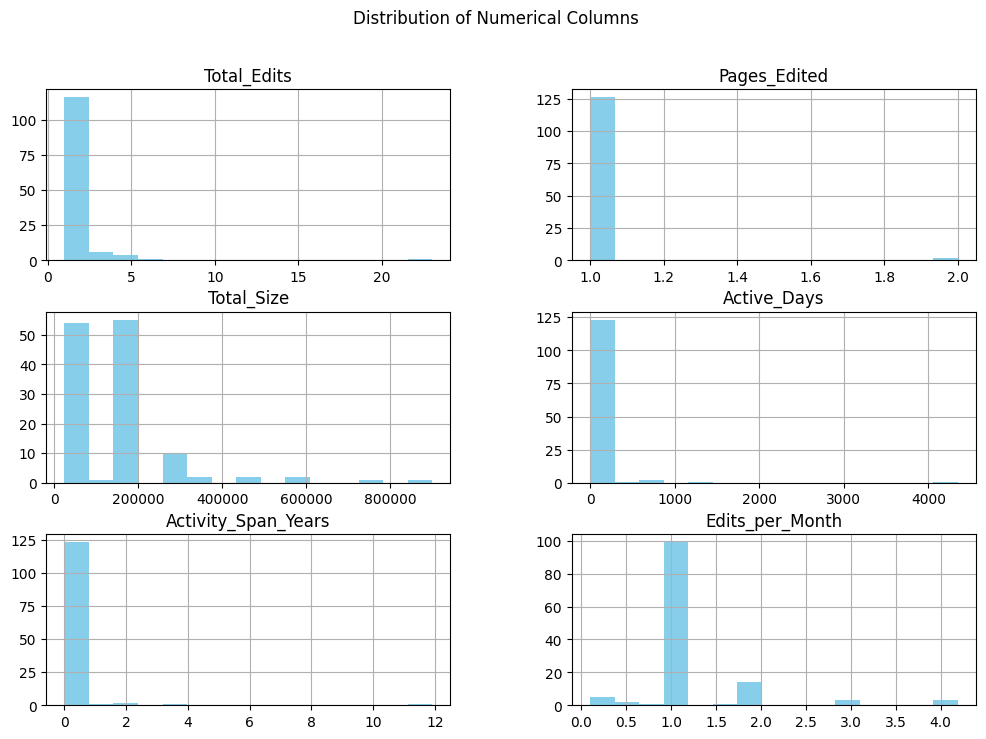

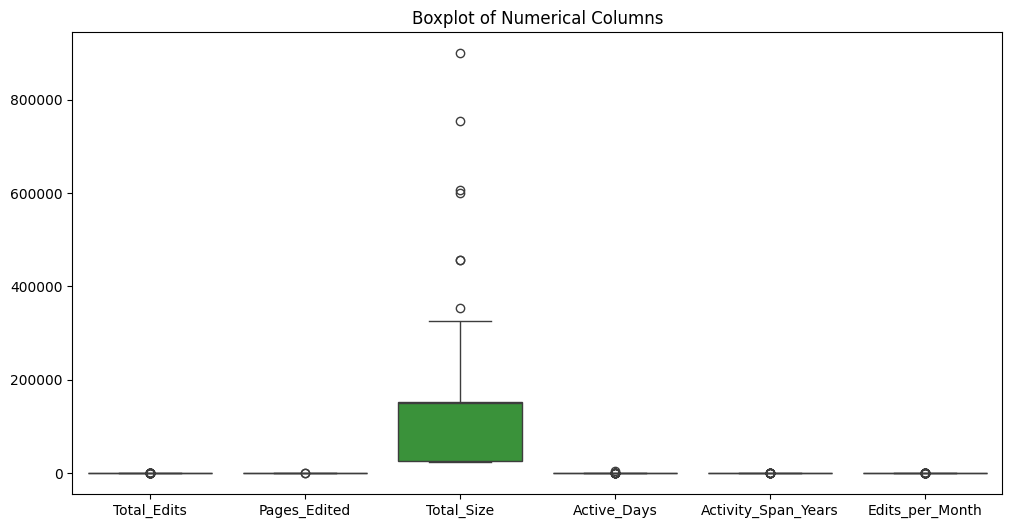

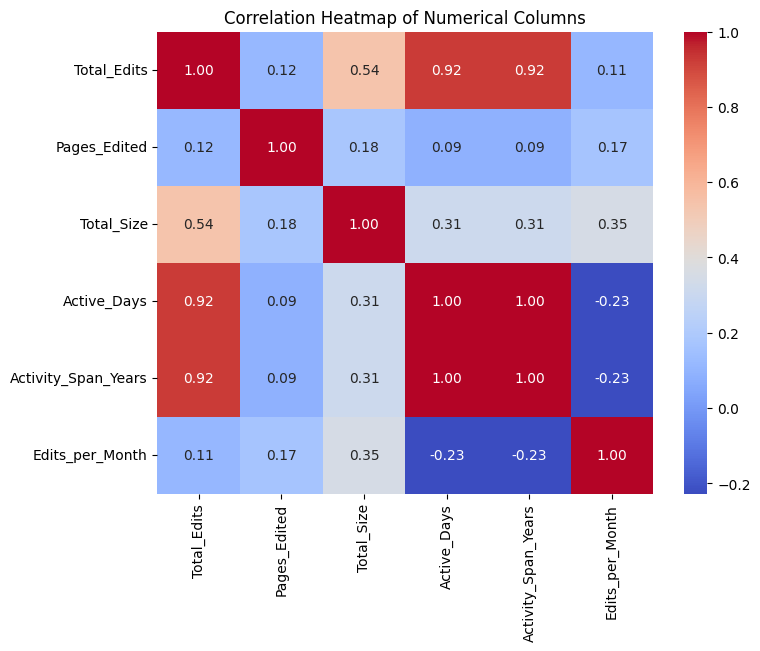

In [ ]:
# === Import Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# === Upload CSV from your computer ===
uploaded = files.upload()  # select zambia_contributors_summary.csv when prompted

# === Load dataset ===
df = pd.read_csv("zambia_contributors_summary.csv")

# === Quick preview ===
print("Dataset shape:", df.shape)
display(df.head(10))

# === Identify numerical columns ===
numerical_cols = ['Total_Edits', 'Pages_Edited', 'Total_Size', 'Active_Days', 'Activity_Span_Years', 'Edits_per_Month']

# === Histograms for distributions ===
df[numerical_cols].hist(figsize=(12,8), bins=15, color='skyblue')
plt.suptitle("Distribution of Numerical Columns")
plt.show()

# === Boxplots for outlier detection ===
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot of Numerical Columns")
plt.show()

# === Correlation heatmap ===
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


## Initial Findings: Wikipedia Contributors on Zambian Pages  

The dataset contains information on **129 unique Wikipedia contributors** to Zambian-related pages. Contributors vary widely in their activity levels.  

- On average, users have made about **3 edits**, though the most active contributor recorded **over 23 edits**, suggesting a small group of highly engaged editors alongside many casual participants.  

- In terms of content creation, the majority of contributors have **not created new articles**, with the average being **less than one per user**. This indicates that most activity is focused on editing existing pages rather than generating new content.  

- Similarly, **talk page edits** and **reverts** are relatively low, suggesting limited involvement in community discussions or edit wars, although a minority of users show higher engagement in these areas.  

- The **last active dates** span a wide range, showing both recently active and long-dormant users.  



# 3. Data Preparation


## Step 1: Quick Data Inspection and Cleaning

Before we start cleaning our dataset, it’s important to **inspect its overall structure and quality**. This initial check helps us identify potential issues and plan the necessary cleaning steps.

- **Shape**: Shows the number of rows and columns, so we know the size of our dataset.  
- **Missing Values**: Lets us see which columns have gaps. This tells us whether we need to fill, drop, or impute missing data.  
- **Duplicates**: Checks if there are repeated records that could bias our analysis.  
- **Data Types**: Confirms whether each column is stored in the correct format (e.g., numbers as numeric, dates as datetime).  
- **Summary Statistics**: Gives quick insights into the distribution, range, and unusual values in both numerical and categorical columns.  

Think of this as a **health check** for the dataset. By identifying these issues early, we ensure that all later analysis, visualizations, and models are built on **clean, reliable, and consistent data**.


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("zambia_contributors_summary.csv")

# Quick inspection
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData Types:\n", df.dtypes)

# Show summary stats
print("\nDescription:\n", df.describe(include="all"))


Shape: (128, 9)

Missing values:
 Contributor            0
Total_Edits            0
Pages_Edited           0
Total_Size             0
First_Edit             0
Last_Edit              0
Active_Days            0
Activity_Span_Years    0
Edits_per_Month        0
dtype: int64

Duplicates: 0

Data Types:
 Contributor             object
Total_Edits              int64
Pages_Edited             int64
Total_Size               int64
First_Edit              object
Last_Edit               object
Active_Days              int64
Activity_Span_Years    float64
Edits_per_Month        float64
dtype: object

Description:
          Contributor  Total_Edits  Pages_Edited     Total_Size  \
count            128   128.000000    128.000000     128.000000   
unique           128          NaN           NaN            NaN   
top     Kosmopolitní          NaN           NaN            NaN   
freq               1          NaN           NaN            NaN   
mean             NaN     1.562500      1.015625  138404.89062

## Data Cleaning: Extract IP Addresses and Usernames

In this step, we handle the `Contributor` column in our dataset. Some entries contain **IP addresses** and others contain **Wikipedia usernames**. We want to split these into two separate columns for easier analysis.

---

### 1. Import Libraries

We use:
- `pandas` for handling tabular data.
- `ipaddress` to validate IPv4 and IPv6 addresses.

```python
import pandas as pd
import ipaddress


In [16]:
import pandas as pd
import re
import ipaddress

# Load your dataset
df = pd.read_csv("zambia_contributors_summary.csv")

#Extract The Ip Address from contributors
def extract_ip(contributor):
    try:
        ipaddress.ip_address(contributor)
        return contributor
    except ValueError:
        return None

# Correct column name
df['IP_Address'] = df['Contributor'].apply(extract_ip)
df['Username'] = df.apply(
    lambda row: row['Contributor'] if pd.isna(row['IP_Address']) else None, axis=1
)

# Display
print(df[['Contributor', 'Username', 'IP_Address']].head(15))



                                Contributor              Username  \
0                              Kosmopolitní          Kosmopolitní   
1                           102.208.220.201                  None   
2                                   Guest88               Guest88   
3                                  Remsense              Remsense   
4   2600:8800:311B:4100:9892:C8B6:AFF1:68F7                  None   
5    2001:4479:900A:2F00:78FD:7EE:28B7:95FA                  None   
6                              Tumbuka Arch          Tumbuka Arch   
7                                  Lightoil              Lightoil   
8                      GeographicAccountant  GeographicAccountant   
9                           102.149.117.245                  None   
10                            102.220.159.6                  None   
11                           JJMC89 bot III        JJMC89 bot III   
12                            Plasticwonder         Plasticwonder   
13                              80